# Artificial Neural Network (ANN,NN)

## Linear Regression
## Logistic Regression

```mermaid
graph LR
    subgraph Input Layer
        I1[x1]
        I2[x2]
    end

    subgraph Hidden Layer 1
        B1("f_11(x1,x2)")
        B2("f_12(x1,x2)")
        B3("f_13(x1,x2)")
    end

    subgraph Hidden Layer 2
        C1("f_21(f_11,f_12,f_13)")
        C2("f_22(f_11,f_12,f_13)")
        C3("f_23(f_11,f_12,f_13)")
    end

    subgraph Output Layer
        O1("y=f_31(f_21,f_22,f_23)")
    end

    I1 --> B1
    I1 --> B2
    I1 --> B3
    I2 --> B1
    I2 --> B2
    I2 --> B3

    B1 --> C1
    B1 --> C2
    B1 --> C3
    B2 --> C1
    B2 --> C2
    B2 --> C3
    B3 --> C1
    B3 --> C2
    B3 --> C3

    C1 --> O1
    C2 --> O1
    C3 --> O1
```

## Forward Propagation
$$
y = f\left(\sum_{i=1}^{n} w_i x_i + b\right) 
$$
- ( x_i ) 是输入值。
- ( w_i ) 是权重。
- ( b ) 是偏置。
- ( f ) 是激活函数。
$$\begin{aligned}
f(x) = a(z(x))\\
z(x) = \sum_{i=1}^{n} w_i x_i + b
\end{aligned}$$
- 有的地方用 ( z ) 表示加权和, ( a ) 表示激活函数。

## Backward Propagation
Weight Update
$$\begin{aligned}
&w_i := w_i - \eta \frac{\partial L}{\partial w_i} \\
&b := b - \eta \frac{\partial L}{\partial b}
\end{aligned}$$

## Activation Functions

$$
\begin{align*}
\text{Sigmoid} & : \sigma(x) = \frac{1}{1+e^{-x}} \\
\text{ReLU} & : f(x) = \max(0,x) \\
\text{Leaky ReLU} & : f(x) = \max(0.01x,x) \\
\text{Softmax} & : \text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{n} e^{x_j}}
\end{align*}
$$

### Linear
即什么都不做，$f(x) = x$

In [2]:
import matplotlib.pyplot as plt
import numpy as np

### Sigmoid
$$\begin{align*}
&\sigma(x) = \frac{1}{1+e^{-x}}\\
&\frac{d\sigma(x)}{dx} = \sigma(x)(1-\sigma(x))
\end{align*}$$
容易求导，但是在$x$很大或很小时，梯度会很小，导致梯度消失，不利于训练。

一般用于输出层，二分类问题。

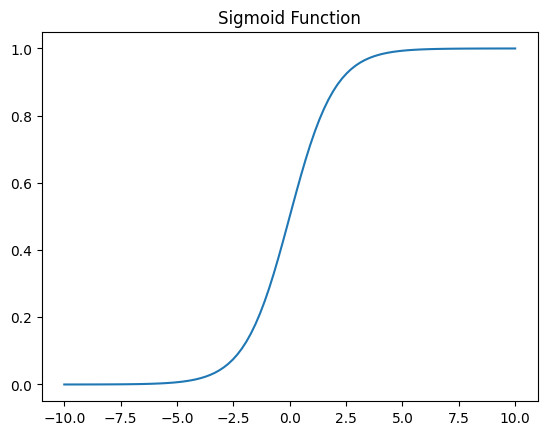

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
x = np.linspace(-10, 10, 100)
y = sigmoid(x)
plt.plot(x, y)
plt.title('Sigmoid Function')
plt.show()

### Tanh
$$\begin{align*}
&\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}\\
&\frac{d\tanh(x)}{dx} = 1 - \tanh^2(x)
\end{align*}$$

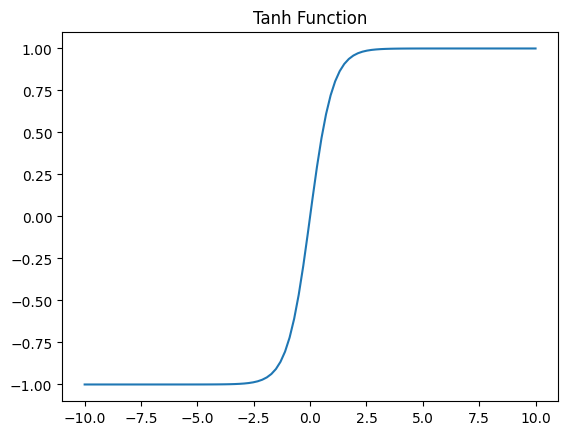

In [4]:
def tanh(x):
    return np.tanh(x)
x = np.linspace(-10, 10, 100)
y = tanh(x)
plt.plot(x, y)
plt.title('Tanh Function')
plt.show()

### ReLU (Rectified Linear Unit)

$$\begin{align*}
&f(x) = \max(0,x)\\
&\frac{df(x)}{dx} = \begin{cases}
0 & x \leq 0\\
1 & x > 0
\end{cases}
\end{align*}
$$
- 当输入大于0时，输出等于输入。
- 当输入小于或等于0时，输出为0。

ReLU的优点是计算简单，并且在训练深度神经网络时能够有效缓解梯度消失问题。

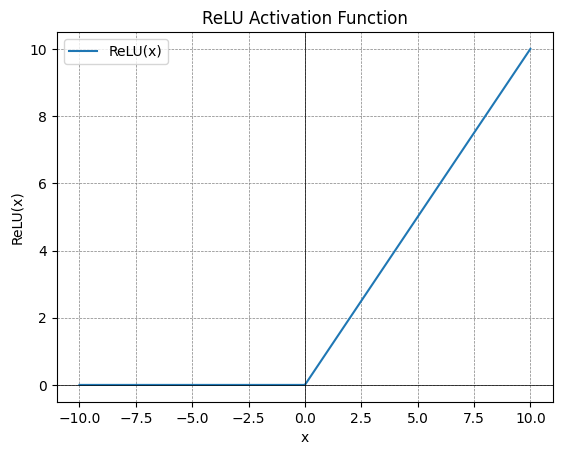

In [1]:
# 定义ReLU函数
def relu(x):
    return np.maximum(0, x)

# 生成x值
x = np.linspace(-10, 10, 400)
y = relu(x)

# 绘制图像
plt.plot(x, y, label='ReLU(x)')
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.title('ReLU Activation Function')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()

#### ReLU6
$$
f(x) = \min(\max(0,x),6)
$$

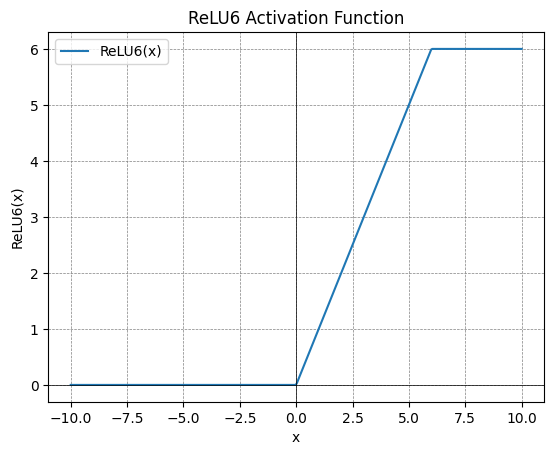

In [7]:
def relu6(x):
    return np.minimum(6, np.maximum(0, x))

# 生成x值
x = np.linspace(-10, 10, 400)
y = relu6(x)

# 绘制图像
plt.plot(x, y, label='ReLU6(x)')
plt.xlabel('x')
plt.ylabel('ReLU6(x)')
plt.title('ReLU6 Activation Function')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()

#### Leaky ReLU
$$
f(x) = \max(0.01x,x)
$$

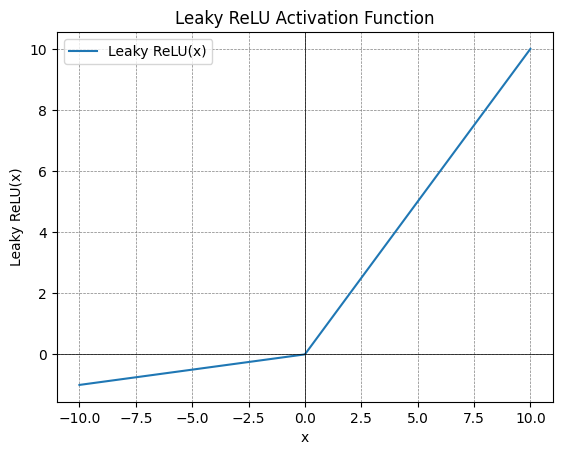

In [11]:
def leaky_relu(x):
    return np.maximum(0.1*x, x)

# 生成x值
x = np.linspace(-10, 10, 400)
y = leaky_relu(x)

# 绘制图像
plt.plot(x, y, label='Leaky ReLU(x)')
plt.xlabel('x')
plt.ylabel('Leaky ReLU(x)')
plt.title('Leaky ReLU Activation Function')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()

### Softmax
$$
\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{n} e^{x_j}}
$$

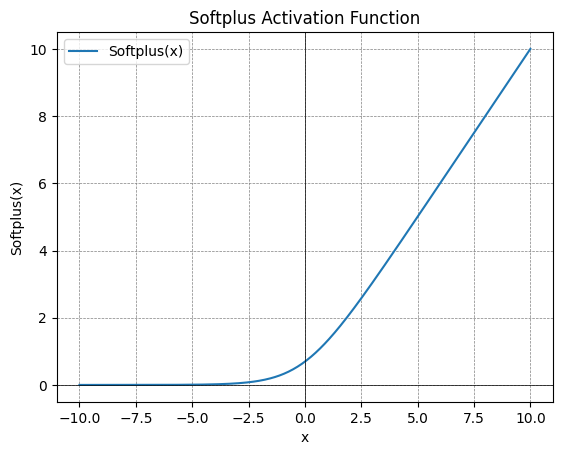

In [15]:
def softplus(x):
    return np.log(1 + np.exp(x))

# 生成x值
x = np.linspace(-10, 10, 400)
y = [softplus(i) for i in x]

# 绘制图像
plt.plot(x, y, label='Softplus(x)')
plt.xlabel('x')
plt.ylabel('Softplus(x)')
plt.title('Softplus Activation Function')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()

## Parameters and Hyper parameters
- Parameters: $w_i$ and $b$
- Hyper parameters: 
  - learning rate: $\eta, \alpha$
  - number of iterations: $N$
  - number of hidden layers: $L$
  - number of neurons in each layer: $n_1, n_2, \ldots, n_L$
  - activation function: $g, a, f$
  - w and b initialization: $w_{t0}, b_{t0}$
  - etc.

### w and b initialization
```python
n = 2 # number of features
nl = 2 # number of neurons in the hidden layer
w = np.random.randn(n,nl)*0.01  # (~=-0.03, ~0.03)
b = np.zeros((nl,1)) # (0,0)
```